In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = df.select_dtypes(include=['float64', 'int64']).values
X

array([[  1,  19,  15,  39],
       [  2,  21,  15,  81],
       [  3,  20,  16,   6],
       [  4,  23,  16,  77],
       [  5,  31,  17,  40],
       [  6,  22,  17,  76],
       [  7,  35,  18,   6],
       [  8,  23,  18,  94],
       [  9,  64,  19,   3],
       [ 10,  30,  19,  72],
       [ 11,  67,  19,  14],
       [ 12,  35,  19,  99],
       [ 13,  58,  20,  15],
       [ 14,  24,  20,  77],
       [ 15,  37,  20,  13],
       [ 16,  22,  20,  79],
       [ 17,  35,  21,  35],
       [ 18,  20,  21,  66],
       [ 19,  52,  23,  29],
       [ 20,  35,  23,  98],
       [ 21,  35,  24,  35],
       [ 22,  25,  24,  73],
       [ 23,  46,  25,   5],
       [ 24,  31,  25,  73],
       [ 25,  54,  28,  14],
       [ 26,  29,  28,  82],
       [ 27,  45,  28,  32],
       [ 28,  35,  28,  61],
       [ 29,  40,  29,  31],
       [ 30,  23,  29,  87],
       [ 31,  60,  30,   4],
       [ 32,  21,  30,  73],
       [ 33,  53,  33,   4],
       [ 34,  18,  33,  92],
       [ 35,  

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [6]:
X_pca

array([[-2.40392421e+00,  8.16423356e-01],
       [-2.34841613e+00,  1.86676324e+00],
       [-2.39355782e+00, -1.42008216e-01],
       [-2.30712586e+00,  1.65321381e+00],
       [-2.33285286e+00,  2.30933312e-01],
       [-2.25411833e+00,  1.67394329e+00],
       [-2.33188174e+00, -9.06912163e-01],
       [-2.18454157e+00,  2.11456942e+00],
       [-2.36353903e+00, -2.46086167e+00],
       [-2.17787288e+00,  1.15393259e+00],
       [-2.33453022e+00, -2.31209422e+00],
       [-2.13577779e+00,  1.64029916e+00],
       [-2.25724264e+00, -1.83121600e+00],
       [-2.07970340e+00,  1.59155073e+00],
       [-2.17745240e+00, -8.23219931e-01],
       [-2.04741968e+00,  1.74672796e+00],
       [-2.09499740e+00, -1.20882392e-01],
       [-2.00559925e+00,  1.48892787e+00],
       [-2.07024899e+00, -1.15069359e+00],
       [-1.93124378e+00,  1.60287275e+00],
       [-1.96519837e+00, -1.27369125e-01],
       [-1.88139711e+00,  1.42116633e+00],
       [-1.97879663e+00, -1.51010785e+00],
       [-1.

In [7]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

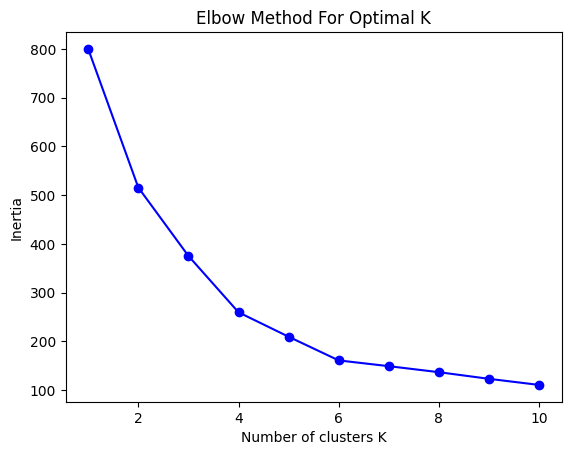

In [8]:
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)

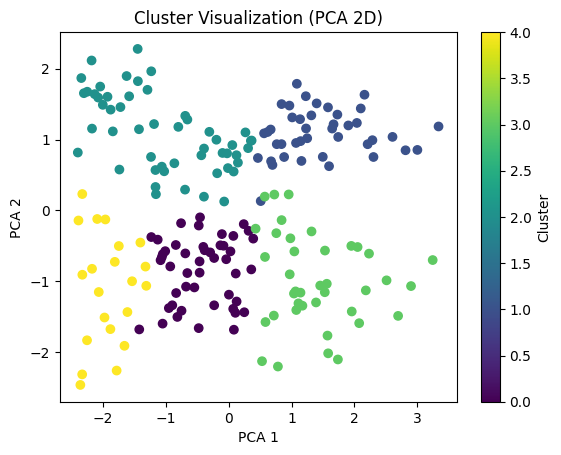

In [10]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('Cluster Visualization (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

In [11]:
score = silhouette_score(X_scaled, labels)
print('Silhouette Score:', score)

Silhouette Score: 0.4272395443393026
